In [1]:
# Importing numpy, pandas, math and matplotlib libraries and setting default fonts

import numpy as np
import pandas as pd
import os
import math
import decimal
import matplotlib
import matplotlib.image as image
from matplotlib import artist
from matplotlib import pyplot as plt
from matplotlib import rcParams
import ipywidgets
from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual,HBox,fixed
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
layout = widgets.Layout(width='400px', height='30px')
pd.options.display.float_format = "{:.2f}".format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']
%matplotlib inline

In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
Rotelle = pd.read_csv('Player_Stats_LL.csv', index_col=0) #husk å sette denne til 1 om det ikke funker

Rotelle = Rotelle.fillna(0)

# To display all columns and rows
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

Rotelle['90s'] = Rotelle['minutes']/90

In [4]:
minutes_position_filtered = (Rotelle['minutes'] >= 90)  & (Rotelle['position'].str.startswith('FW'))
df = Rotelle.loc[minutes_position_filtered, ['player', 'squad', 'minutes', 'position', 'passes_pct', 'progressive_passes', 'passes_into_final_third', 'passes_into_penalty_area', 'assisted_shots','passes_pressure', 'miscontrols', 'dispossessed', 'dribbles_completed_pct', 'dribbles_completed', 'carry_progressive_distance', 'carries', 'carries_into_final_third','touches_att_3rd', 'touches_att_pen_area', 'pass_targets', 'passes_received_pct', 'passes_received', 'gca_per90', 'sca_per90', 'xg_per90', 'npxg_per90','xa_per90', 'npxg_xa_per90', 'xa_net', 'npxg_net','npxg_per_shot', 'shots_on_target_pct', 'aerials_won_pct','aerials_won', 'tackles_won', 'tackles', 'interceptions', 'ball_recoveries', 'pressure_regain_pct', 'dribbled_past', '90s']] #Do not touch this line!!
minutes_filteret = df.set_index('player')

minutes_filteret.head(500)

,squad,minutes,position,passes_pct,progressive_passes,passes_into_final_third,passes_into_penalty_area,assisted_shots,passes_pressure,miscontrols,dispossessed,dribbles_completed_pct,dribbles_completed,carry_progressive_distance,carries,carries_into_final_third,touches_att_3rd,touches_att_pen_area,pass_targets,passes_received_pct,passes_received,gca_per90,sca_per90,xg_per90,npxg_per90,xa_per90,npxg_xa_per90,xa_net,npxg_net,npxg_per_shot,shots_on_target_pct,aerials_won_pct,aerials_won,tackles_won,tackles,interceptions,ball_recoveries,pressure_regain_pct,dribbled_past,90s
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sergio Agüero,Barcelona,151.00,FW,72.10,2.00,2.00,0.00,1.00,15.00,5.00,2.00,100.00,1.00,111.00,38.00,2.00,33.00,15.00,78.00,67.90,53.00,0.00,1.79,0.64,0.64,0.16,0.80,-0.30,-0.10,0.18,16.70,66.70,4.00,1.00,1.00,0.00,3.00,16.70,1.00,1.68
Paco Alcácer,Villarreal,271.00,FW,82.80,5.00,3.00,1.00,3.00,12.00,7.00,4.00,66.70,2.00,55.00,43.00,1.00,50.00,15.00,108.00,57.40,62.00,0.66,1.99,0.11,0.11,0.42,0.53,-0.30,-0.30,0.11,33.30,54.50,6.00,1.00,2.00,3.00,5.00,32.40,0.00,3.01
Amath,Mallorca,518.00,"FW,MF",76.30,9.00,8.00,2.00,3.00,21.00,12.00,10.00,53.80,7.00,345.00,113.00,6.00,66.00,16.00,188.00,57.40,108.00,0.17,2.08,0.14,0.14,0.04,0.18,0.80,-0.80,0.13,33.30,8.30,1.00,11.00,20.00,6.00,19.00,21.60,4.00,5.76
Florin Andone,Cádiz,109.00,FW,66.70,2.00,2.00,0.00,0.00,7.00,6.00,2.00,0.00,0.00,7.00,17.00,0.00,16.00,2.00,68.00,38.20,26.00,0.00,0.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.30,6.00,0.00,0.00,0.00,4.00,28.60,0.00,1.21
Iago Aspas,Celta Vigo,1058.00,FW,71.50,28.00,16.00,12.00,28.00,93.00,34.00,10.00,64.70,11.00,1159.00,395.00,26.00,339.00,73.00,594.00,72.10,428.00,0.17,3.83,0.42,0.30,0.23,0.53,-1.70,0.50,0.13,35.70,40.00,14.00,2.00,4.00,9.00,75.00,25.00,3.00,11.76
Ezequiel Ávila,Osasuna,425.00,FW,63.70,5.00,7.00,2.00,4.00,21.00,14.00,4.00,0.00,0.00,251.00,77.00,5.00,91.00,21.00,254.00,41.30,105.00,0.64,2.33,0.23,0.23,0.12,0.35,-0.60,0.90,0.09,58.30,25.70,9.00,1.00,2.00,4.00,21.00,32.80,2.00,4.72
Carlos Bacca,Granada,439.00,FW,62.20,6.00,6.00,2.00,3.00,32.00,5.00,4.00,75.00,6.00,191.00,70.00,2.00,60.00,17.00,168.00,50.60,85.00,0.41,2.05,0.11,0.11,0.08,0.19,0.60,-0.50,0.09,16.70,41.70,10.00,3.00,5.00,2.00,14.00,28.30,1.00,4.88
Alejandro Balde,Barcelona,97.00,"FW,DF",93.50,5.00,2.00,2.00,1.00,6.00,3.00,1.00,25.00,1.00,152.00,66.00,3.00,35.00,3.00,69.00,87.00,60.00,0.00,0.93,0.00,0.00,0.05,0.05,-0.10,0.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,8.00,31.80,0.00,1.08
Gareth Bale,Real Madrid,190.00,FW,74.50,6.00,3.00,3.00,1.00,15.00,3.00,5.00,33.30,1.00,103.00,44.00,1.00,39.00,7.00,84.00,67.90,57.00,0.00,0.47,0.17,0.17,0.02,0.19,0.00,0.60,0.05,28.60,50.00,4.00,0.00,0.00,5.00,7.00,30.40,4.00,2.11


In [5]:
passing_percentiles = pd.DataFrame()
passing_percentiles['squad'] = minutes_filteret['squad']

#Passing stats
passing_percentiles['Pass\nCompletion %'] = minutes_filteret['passes_pct'].rank(pct=True)*100
passing_percentiles['Pressured Passes\nPer 90'] = minutes_filteret['passes_pressure'].rank(pct=True)*100
passing_percentiles['Progressive Passes\nPer 90'] = \
    (minutes_filteret['progressive_passes']/minutes_filteret['90s']).rank(pct=True)*100
passing_percentiles['Successful Deliveries\nInto Box Per 90'] = \
    (minutes_filteret['passes_into_penalty_area']/minutes_filteret['90s']).rank(pct=True)*100
passing_percentiles['Key Passes\n Per 90'] = \
    (minutes_filteret['assisted_shots']/minutes_filteret['90s']).rank(pct=True)*100


#Possesion stats
passing_percentiles['Rate Adj Target of an\nAttempted Pass'] =\
    (minutes_filteret['passes_received']*minutes_filteret['passes_received_pct']).rank(pct=True)*100     
passing_percentiles['Turnovers\nPer 90'] = \
    ((minutes_filteret['miscontrols']+minutes_filteret['dispossessed'])/minutes_filteret['90s']).rank(pct=True, ascending=False)*100
passing_percentiles['Rate Adj Successful\nDribbles Per 90'] =\
    (minutes_filteret['dribbles_completed']*minutes_filteret['dribbles_completed_pct']/ \
    minutes_filteret['90s']).rank(pct=True)*100                                          
passing_percentiles['Progressive Distance\nPer Carry'] = \
    (minutes_filteret['carry_progressive_distance']/minutes_filteret['carries']).rank(pct=True)*100
passing_percentiles['Final Third\nEntries'] = minutes_filteret['carries_into_final_third'].rank(pct=True)*100
passing_percentiles['Touches in\nBox'] = minutes_filteret['touches_att_pen_area'].rank(pct=True)*100


#Contribution stats
passing_percentiles['GCA\nPer 90'] = minutes_filteret['gca_per90'].rank(pct=True)*100
passing_percentiles['SCA\nPer 90'] = minutes_filteret['sca_per90'].rank(pct=True)*100
passing_percentiles['xA\nPer 90'] = minutes_filteret['xa_per90'].rank(pct=True)*100
passing_percentiles['Non-Penalty\nxG Per 90'] = minutes_filteret['npxg_per90'].rank(pct=True)*100
passing_percentiles['Non-Penalty\nxA + xG Per 90'] = minutes_filteret['npxg_xa_per90'].rank(pct=True)*100 
passing_percentiles['xG\nPer Shot'] = minutes_filteret['npxg_per_shot'].rank(pct=True)*100
passing_percentiles['Netto xA'] = minutes_filteret['xa_net'].rank(pct=True)*100 


#Defening stats
passing_percentiles['Rate Adj\nAerials Won %'] = \
    (minutes_filteret['aerials_won']*minutes_filteret['aerials_won_pct']).rank(pct=True)*100     
passing_percentiles['Ball recoveries\nPer 90'] = \
    (minutes_filteret['ball_recoveries']/minutes_filteret['90s']).rank(pct=True)*100    
passing_percentiles['Interceptions\nPer 90'] = \
    (minutes_filteret['interceptions']/minutes_filteret['90s']).rank(pct=True)*100 
passing_percentiles['Pressure\nRegain %'] = minutes_filteret['pressure_regain_pct'].rank(pct=True)*100
passing_percentiles['Rate Adj Tackles\n Won %'] = \
    ((minutes_filteret['tackles_won'])*(minutes_filteret['tackles_won']/minutes_filteret['tackles'])).rank(pct=True)*100
passing_percentiles['Dribbled Past'] = minutes_filteret['dribbled_past'].rank(pct=True, ascending=False)*100
                                          
passing_percentiles['minutes'] = minutes_filteret['minutes']
passing_percentiles['position'] = minutes_filteret['position']
passing_percentiles['90s'] = minutes_filteret['90s']

In [6]:
passing_percentiles['minutes'] = passing_percentiles['minutes'].astype(int)
passing_percentiles['minutes'] = passing_percentiles['minutes'].astype(str)
passing_percentiles = passing_percentiles.fillna(0)
passing_percentiles.head(500)

,squad,Pass\nCompletion %,Pressured Passes\nPer 90,Progressive Passes\nPer 90,Successful Deliveries\nInto Box Per 90,Key Passes\n Per 90,Rate Adj Target of an\nAttempted Pass,Turnovers\nPer 90,Rate Adj Successful\nDribbles Per 90,Progressive Distance\nPer Carry,Final Third\nEntries,Touches in\nBox,GCA\nPer 90,SCA\nPer 90,xA\nPer 90,Non-Penalty\nxG Per 90,Non-Penalty\nxA + xG Per 90,xG\nPer Shot,Netto xA,Rate Adj\nAerials Won %,Ball recoveries\nPer 90,Interceptions\nPer 90,Pressure\nRegain %,Rate Adj Tackles\n Won %,Dribbled Past,minutes,position,90s
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Paco Alcácer,Villarreal,92.71,10.94,54.17,14.06,83.33,17.71,93.75,52.08,22.92,15.62,51.04,92.71,79.17,98.96,40.62,97.92,70.83,22.92,41.15,3.12,90.62,66.15,23.26,90.62,165,FW,1.83
Amath,Mallorca,53.12,37.50,36.46,32.29,15.62,25.00,40.62,89.58,75.00,60.94,46.88,55.73,64.58,18.23,26.56,16.67,47.92,93.75,10.42,54.17,64.58,43.23,90.12,66.15,317,"FW,MF",3.52
Iago Aspas,Celta Vigo,43.75,97.92,63.54,75.00,86.46,94.79,57.29,66.67,63.54,96.88,96.88,57.81,69.79,78.65,69.79,71.35,66.15,22.92,69.79,95.83,81.77,21.88,6.98,66.15,616,FW,6.84
Ezequiel Ávila,Osasuna,32.29,22.40,56.25,42.71,53.12,19.79,30.73,6.25,40.62,31.77,34.38,85.42,72.92,64.06,40.62,42.19,32.81,22.92,28.12,52.08,50.00,96.88,0.00,45.31,216,FW,2.40
Carlos Bacca,Granada,22.40,70.83,55.21,51.04,52.08,21.88,96.88,80.21,78.12,31.77,60.42,75.52,55.21,61.46,9.90,23.96,10.94,88.02,66.67,37.50,59.38,31.25,36.05,45.31,325,FW,3.61
Gareth Bale,Real Madrid,66.67,31.25,78.12,84.38,28.12,35.42,62.50,19.79,43.75,15.62,18.23,24.48,6.25,25.52,44.79,28.12,18.23,66.15,53.12,25.00,98.96,73.96,0.00,21.35,190,FW,2.11
Bebé,Rayo Vallecano,12.50,54.69,84.38,81.77,98.96,26.04,13.54,100.00,98.96,95.31,1.04,98.96,88.54,100.00,23.96,96.88,4.69,91.67,60.94,90.62,73.44,6.25,6.98,90.62,130,"FW,MF",1.44
Darío Benedetto,Elche,26.04,49.48,57.29,52.08,14.58,37.50,69.79,41.67,30.21,60.94,34.38,55.73,16.67,45.83,79.17,66.15,76.04,33.85,76.56,6.25,60.42,43.23,18.02,66.15,323,FW,3.59
Karim Benzema,Real Madrid,91.67,89.58,90.62,89.58,91.67,95.83,86.46,68.75,61.46,95.31,97.92,94.79,89.58,96.88,76.04,95.83,53.65,100.00,32.29,42.71,38.54,41.15,15.12,21.35,617,FW,6.86


In [7]:
def label_adjuster(i):
    
    if i <= 50: #Everything under this percentile will be pushed to a 100 - outside the chart
        return 100
    else:
        return -10

In [8]:
def percentile_chart(player_name):
    
    # Creates bars based on the player entered
    theta = list(map((lambda x: x*math.pi/24), list(range(1,49,2))))
    radii = list(passing_percentiles.loc[player_name][1:25])
    width = [math.pi/12]*len(radii)
    
    # Aesthetic details of the figure including color, axis tick size, x value specifics
    # and r-axis limits, etc.
    plt.figure(figsize=(10,10), facecolor = '#ffffff')
    ax = plt.subplot(111, projection='polar')
    ax.set_facecolor('#ffffff')
    #ax = plt.subplot(111, projection='polar')
    ax.grid(True)
    ax.xaxis.grid(linewidth=2.5, color='#343a40')
    ax.yaxis.grid(linewidth=1.5, color='#6c757d', alpha=0.6)
    ax.tick_params(axis='x', colors='xkcd:black')
    ax.tick_params(axis='y', colors='xkcd:black')
    ax.set_rlim(0,100)
    ax.spines['polar'].set_color('xkcd:white')
    ax.spines['polar'].set_linewidth(3)
    ax.set_rlabel_position(0)
    ax.set_rticks([25,50,75])
    ax.tick_params(labelsize=0)
    labels = plt.thetagrids(range(0, 360, 15), ('','','','','','','','','','','','','','','','','','','','','','','',''))
    ax.spines['polar'].set_color('xkcd:black')
    ax.spines['polar'].set_linewidth(2.5)
    ax.set_rorigin(-15)
   
    # Aesthetic details of the bars and chart titles based on player name
    ax.bar(theta, radii, width, color=['#ffba08','#ffba08','#ffba08','#ffba08','#ffba08','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#ef233c','#ef233c','#ef233c','#ef233c','#ef233c','#ef233c','#ef233c','#2a9d8f','#2a9d8f', '#2a9d8f', '#2a9d8f', '#2a9d8f','#2a9d8f'], \
           alpha=0.7, edgecolor='#000000', linewidth=0.5)
    ax.set_title('\n'+player_name+' - Performance Overview\n\n\n', \
                 color='#212f45', fontsize=26)
    plt.text(0.5, 1.13, "Position: " + r"$\bf{" + passing_percentiles.at[player_name, 'position'] + "}$" + " || " + " Minutes Played: " + r"$\bf{" + passing_percentiles.at[player_name, 'minutes'] + "}$", \
         horizontalalignment='center', verticalalignment='top', color='#ef233c', size='17', \
             transform=ax.transAxes)

    l = list(passing_percentiles)
    
    #Adds text to the chart in necessary places
    plt.text(-0.15, -0.1, 'Data obtained from FBRef.com', \
         horizontalalignment='left', verticalalignment='top', color='xkcd:black', \
             transform=ax.transAxes, size='14')
    plt.text(0.5, 1.22, "Percentile Rankings vs DF in same League, 2020/21", \
         horizontalalignment='center', verticalalignment='top', color='#212f45', size='14', \
             transform=ax.transAxes)
    plt.text(1.2, -0.075, '\nExcludes players with <600 minutes', \
        horizontalalignment='right', verticalalignment='top', color='xkcd:black', \
             style='italic', transform=ax.transAxes, size='14')

    
  
    #fixing bars lables
    plt.text(1.11, 0.59, l[1], \
         horizontalalignment='center', verticalalignment='top', color='xkcd:black', \
             transform=ax.transAxes, size='13',)
    plt.text(1.07, 0.7, l[2], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13',)
    plt.text(1.02, 0.81, l[3], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.92, 0.93, l[4], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.76, 1, l[5], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.59, 1.055, l[6], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.4, 1.055, l[7], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.23, 1.01, l[8], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.09, 0.93, l[9], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0, 0.83, l[10], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(-0.05, 0.7, l[11], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(-0.09, 0.57, l[12], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(-0.08, 0.42, l[13], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(-0.03, 0.29, l[14], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13') 
    plt.text(0.03, 0.16, l[15], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13') 
    plt.text(0.13, 0.063, l[16], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13') 
    plt.text(0.27, -0.02, l[17], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.42, -0.04, l[18], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text( 0.58, -0.04, l[19], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.75, -0.02, l[20], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(0.89, 0.063, l[21], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')
    plt.text(1, 0.17, l[22], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13') 
    plt.text(1.08, 0.3, l[23], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13') 
    plt.text(1.11, 0.42, l[24], \
         horizontalalignment='center', verticalalignment='center', color='xkcd:black',\
             transform=ax.transAxes, size='13')            

    
    # Annotating bar labels with their values
    for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
        plt.annotate(str(int(round(radii[i])))+"%", (theta[i], radii[i]+label_adjuster(radii[i])), color='xkcd:black', \
                horizontalalignment='center', fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.12, right=0.85, top=0.85, bottom=0.08)

    #plt.show() If saving pic this needs to be hashed out

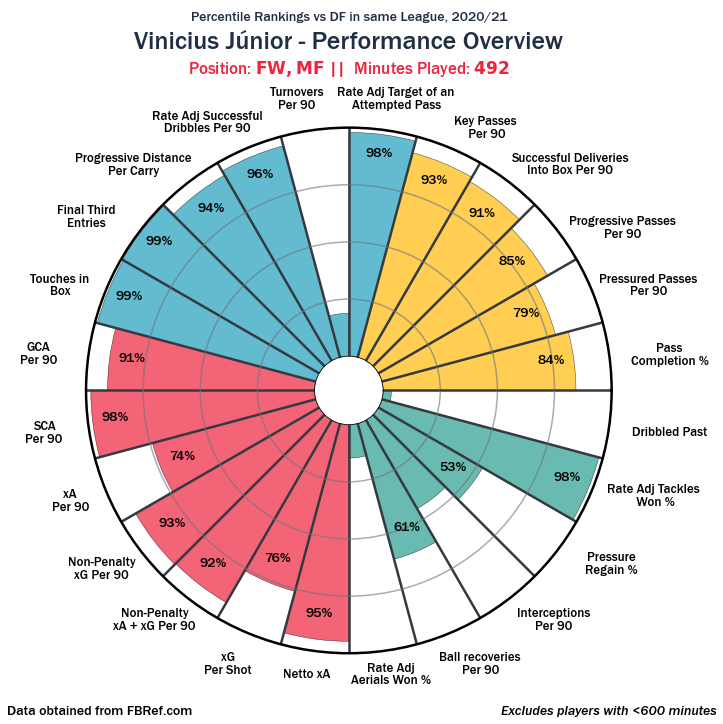

In [13]:
percentile_chart('Vinicius Júnior')

In [10]:
def directory(squad_name):

    players = passing_percentiles['squad'] == squad_name
    return passing_percentiles[players] 

In [11]:
directory('Athletic Club')

,squad,Pass\nCompletion %,Pressured Passes\nPer 90,Progressive Passes\nPer 90,Successful Deliveries\nInto Box Per 90,Key Passes\n Per 90,Rate Adj Target of an\nAttempted Pass,Turnovers\nPer 90,Rate Adj Successful\nDribbles Per 90,Progressive Distance\nPer Carry,Final Third\nEntries,Touches in\nBox,GCA\nPer 90,SCA\nPer 90,xA\nPer 90,Non-Penalty\nxG Per 90,Non-Penalty\nxA + xG Per 90,xG\nPer Shot,Netto xA,Rate Adj\nAerials Won %,Ball recoveries\nPer 90,Interceptions\nPer 90,Pressure\nRegain %,Rate Adj Tackles\n Won %,Dribbled Past,minutes,position,90s
player,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Raúl García,Athletic Club,15.10,66.67,71.88,77.08,44.79,62.50,91.67,44.79,51.04,60.94,68.75,24.48,33.33,87.50,35.42,55.73,32.81,2.08,92.71,46.88,83.33,34.90,59.30,66.15,382,FW,4.24
Oihan Sancet,Athletic Club,80.21,10.94,73.96,88.54,82.29,36.46,50.00,6.25,27.08,60.94,27.08,84.38,77.08,90.10,14.06,48.96,18.23,84.38,9.38,34.38,16.67,46.88,92.44,66.15,227,FW,2.52
Asier Villalibre,Athletic Club,1.04,15.62,7.29,14.06,32.29,38.54,66.67,88.54,79.17,79.17,56.25,24.48,53.12,18.23,85.42,73.44,70.83,66.15,75.00,1.04,16.67,86.46,23.26,66.15,167,FW,1.86
Iñaki Williams,Athletic Club,18.75,74.48,59.38,73.96,46.88,78.12,48.96,36.46,65.62,71.35,95.31,24.48,38.02,58.85,89.58,83.85,81.77,7.29,81.25,38.54,33.33,64.06,36.05,45.31,617,FW,6.86


In [12]:
percentile_chart('Javi Galán') 
plt.savefig(r'C:\Users\Marti\OneDrive\Skrivebord\Jupyter Notebook\Javi Galán.png')

KeyError: 'Javi Galán'